In [1]:
import pandas as pd
import torch
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from french_preprocessing.french_preprocessing import FrenchPreprocessing
from unidecode import unidecode
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Prétraitement
default_stopwords = [
    # List of default stopwords...
]
default_symbols = """#§_-@+=*<>()[]{}/\\"'"""
default_punct = """!;:,.?-..."""

preprocessor = FrenchPreprocessing(
    stopwords=default_stopwords, symbols=default_symbols, punct=default_punct
)

Some weights of the model checkpoint at gilf/french-camembert-postag-model were not used when initializing CamembertForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
model_svm = joblib.load('models/SVM_optimized.joblib')
model_ensemble = joblib.load('models/ensemble_model.joblib')
model_random_forest = joblib.load('models/Random Forest_optimized.joblib')
model_logistic_regression = joblib.load('models/Logistic Regression_optimized.joblib')

In [11]:
# Load the data
df = pd.read_csv('data/combined_dataset.csv')
df = df.dropna()
df["preprocessed_text"] = df["text"].apply(preprocessor.preprocessing)

X = df["preprocessed_text"]
y = df["label"]

In [12]:
y_pred_svm = model_svm.predict(X)
y_pred_ensemble = model_ensemble.predict(X)
y_pred_random_forest = model_random_forest.predict(X)
y_pred_logistic_regression = model_logistic_regression.predict(X)

In [13]:
def plot_confusion_matrix(y_true, y_pred):
 cm = confusion_matrix(y_true, y_pred)
 plt.figure(figsize=(10, 7))
 sns.heatmap(
 cm, annot=True, fmt="d", cmap="Blues", cbar=True, annot_kws={"size": 14}
 )
 plt.title(f"Confusion Matrix ", fontsize=16)
 plt.xlabel("Predicted", fontsize=14)
 plt.ylabel("True", fontsize=14)
 plt.xticks(fontsize=12)
 plt.yticks(fontsize=12)
 plt.show()
 print("Confusion Matrix:\n", cm)

In [14]:
print(f"Précision SVM : {accuracy_score(y, y_pred_svm):.4f}")
print("\nRapport de classification :")
print(classification_report(y, y_pred_svm))

print(f"Précision Voting Classifier : {accuracy_score(y, y_pred_ensemble):.4f}")
print("\nRapport de classification :")
print(classification_report(y, y_pred_ensemble))

print(f"Précision Random Forest : {accuracy_score(y, y_pred_random_forest):.4f}")
print("\nRapport de classification :")
print(classification_report(y, y_pred_random_forest))

print(f"Précision Logistic Regression : {accuracy_score(y, y_pred_logistic_regression):.4f}")
print("\nRapport de classification :")
print(classification_report(y, y_pred_logistic_regression))

Précision SVM : 0.8950

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.92      0.88      0.90      7224
 non_hateful       0.87      0.91      0.89      6171

    accuracy                           0.89     13395
   macro avg       0.89      0.90      0.89     13395
weighted avg       0.90      0.89      0.90     13395

Précision Voting Classifier : 0.8683

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.88      0.87      0.88      7224
 non_hateful       0.85      0.87      0.86      6171

    accuracy                           0.87     13395
   macro avg       0.87      0.87      0.87     13395
weighted avg       0.87      0.87      0.87     13395

Précision Random Forest : 0.8407

Rapport de classification :
              precision    recall  f1-score   support

     hateful       0.85      0.86      0.85      7224
 non_hateful       0.83      0.82      0.83      6171

  

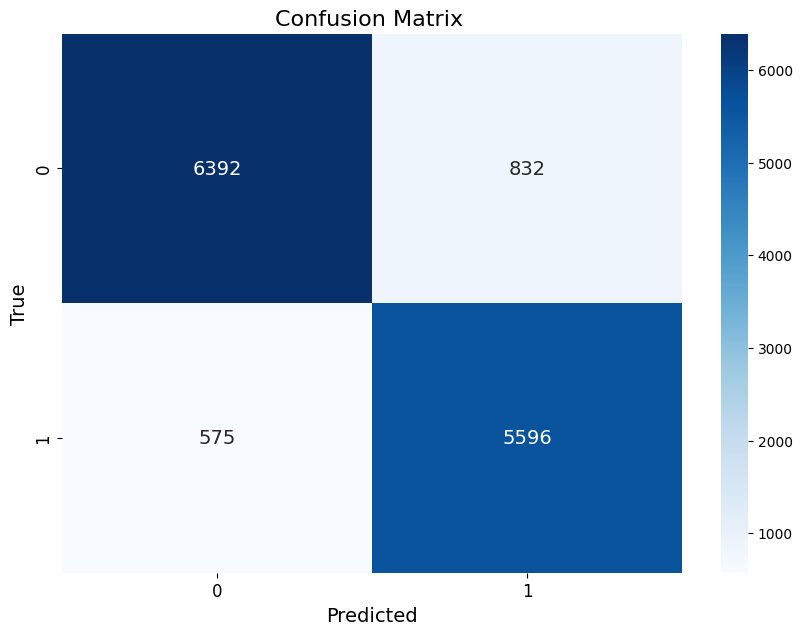

Confusion Matrix:
 [[6392  832]
 [ 575 5596]]


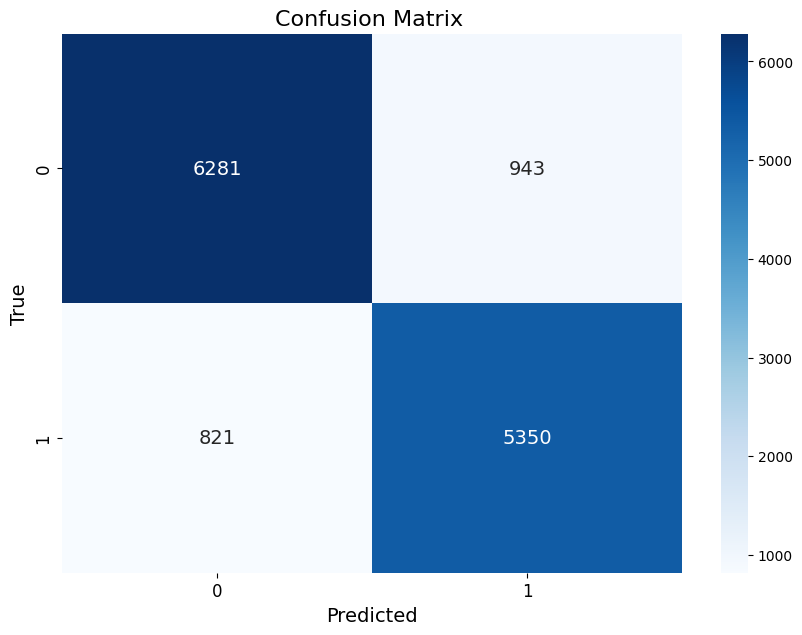

Confusion Matrix:
 [[6281  943]
 [ 821 5350]]


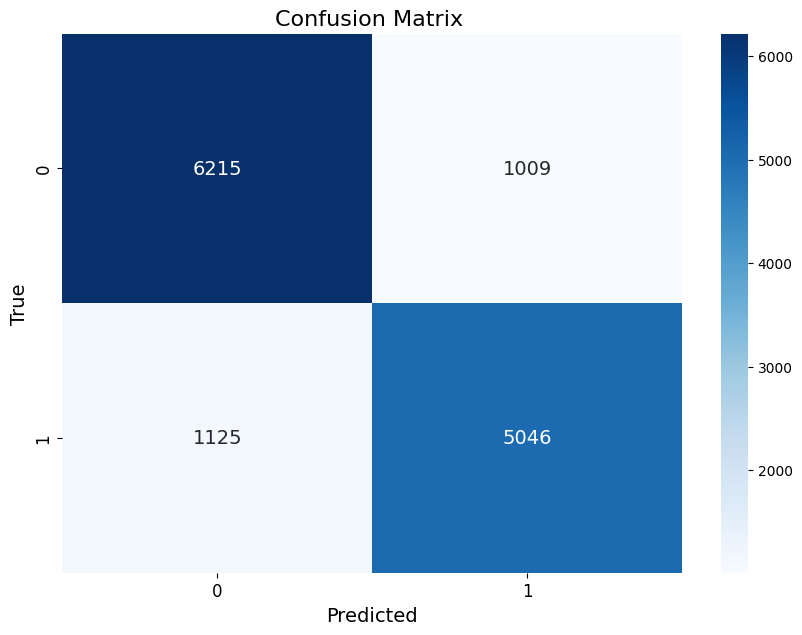

Confusion Matrix:
 [[6215 1009]
 [1125 5046]]


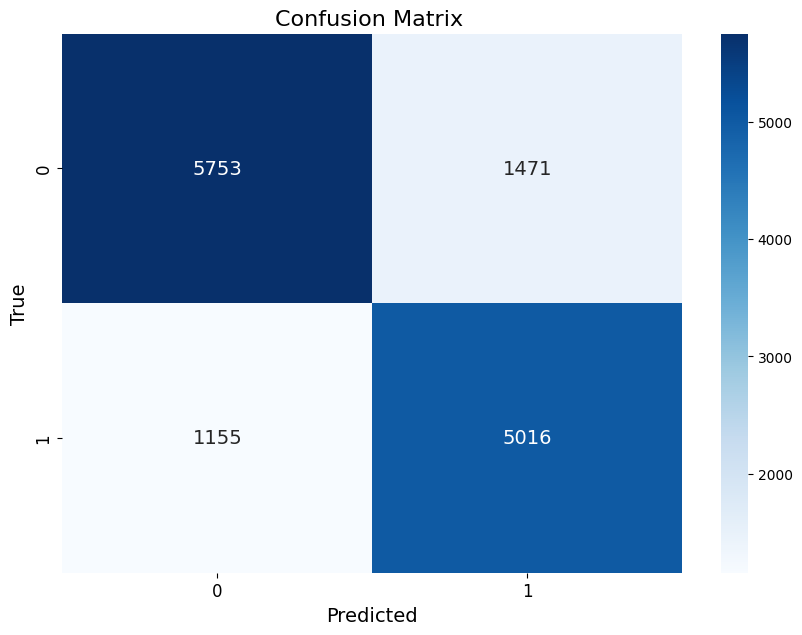

Confusion Matrix:
 [[5753 1471]
 [1155 5016]]


In [15]:
plot_confusion_matrix(y, y_pred_svm)
plot_confusion_matrix(y, y_pred_ensemble)
plot_confusion_matrix(y, y_pred_random_forest)
plot_confusion_matrix(y, y_pred_logistic_regression)